In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Dataset - Group 50 - Data - New.csv")
df = df.iloc[:158]

# print(df)
print(df.isnull().sum())

ID                      0
Timestamp               0
Tweet URL               0
Group                   0
Collector               0
Category                0
Topic                   0
Keywords                0
Account handle          0
Account name            0
Account bio            41
Account type            0
Joined                  0
Following               0
Followers               0
Location               78
Tweet                   0
Tweet Translated      158
Tweet Type              0
Date posted             0
Screenshot             53
Content type            0
Likes                   0
Replies                 2
Retweets                0
Quote Tweets          118
Views                 156
Rating                  1
Reasoning               6
Remarks                51
Add columns here      158
Add columns here.1    158
Add columns here.2    158
Reviewer              157
Review                157
dtype: int64


In [15]:
df.drop(['Add columns here', 'Add columns here.1', 'Add columns here.2', 'Reviewer', 'Review'], axis = 1, inplace = True)
df.drop(['Account bio', 'Tweet Translated', 'Views', 'Remarks', 'Location', 'Reasoning', 'Screenshot'], axis = 1, inplace = True)
df['Quote Tweets'].fillna(0, inplace = True)
df['Replies'].fillna(0, inplace = True)
df['Rating'].fillna('FALSE', inplace = True)

print(df.isnull().sum())

ID                0
Timestamp         0
Tweet URL         0
Group             0
Collector         0
Category          0
Topic             0
Keywords          0
Account handle    0
Account name      0
Account type      0
Joined            0
Following         0
Followers         0
Tweet             0
Tweet Type        0
Date posted       0
Content type      0
Likes             0
Replies           0
Retweets          0
Quote Tweets      0
Rating            0
dtype: int64


<p> Notice in the results above that when we print out the sum of null values found in the dataset, we get 0 for all the columns. This means that we have dealt with all the null values found in our data set. <p>

In [16]:
df['Date posted'] = pd.to_datetime(df['Date posted'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Rating'] = df['Rating'].replace('FALSE. MISLEADING', 'FALSE, MISLEADING')
df['Followers'] = df['Followers'].replace('28.3K', '28,300')
df['Followers'] = df['Followers'].replace('20.4K', '20,300')

print(df['Date posted'].dtype)
print(df['Date posted'].head(5))

datetime64[ns]
0   2020-03-24 21:39:00
1   2019-06-21 01:03:00
2   2018-06-17 00:54:00
3   2018-06-17 09:26:00
4   2020-07-24 09:07:00
Name: Date posted, dtype: datetime64[ns]


C:\Users\Fort Bueno\AppData\Local\Temp\ipykernel_20488\3685251170.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date posted'] = pd.to_datetime(df['Date posted'])
C:\Users\Fort Bueno\AppData\Local\Temp\ipykernel_20488\3685251170.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


<p>The results above shows the first 5 data of the Date posted column as well as its datatype. </p>

<h3><b>Data Visualization and Plotting</b></h3>

<p>The next step after preprocessing all the data is to visualize its contents using charts, plots, and other visualizing techniques to present the complex data and represent its relationship, trends, and pattern.</p>

<p>Some of the visualization techniques we used are scatterplots to show the distribution, heatmaps to show corelations, bar graphs to show comparison, and line graphs for comparison.</p>

<h3><b> Plotting </b></h3>

In [17]:
from calendar import month_name as mn
import matplotlib.dates as mdates
import numpy as np

grouped_df = df.groupby('Date posted').size().reset_index(name='count')
grouped_df.set_index(['Date posted'], inplace = True)
count_monthly = grouped_df[['count']].resample('M').sum()


count_monthly['count'] = count_monthly['count'].replace(0, np.NaN)
#nearest interpolation
count_monthly['count_nearest'] = count_monthly['count'].interpolate(method='nearest')
#linear interpolation
count_monthly['count_linear'] = count_monthly['count'].interpolate(method='linear')
#weighted time interpolation
count_monthly['count_time'] = count_monthly['count'].interpolate(method='time')
#fill missing dates using average tweets per month

count_monthly['count_average'] = count_monthly['count'].replace(np.NaN, count_monthly['count'].mean())
count_monthly['count'] = count_monthly['count'].replace(np.NaN, 0)
print(count_monthly.head(5))


             count  count_nearest  count_linear  count_time  count_average
Date posted                                                               
2016-03-31     1.0            1.0           1.0         1.0       1.000000
2016-04-30     1.0            1.0           1.0         1.0       1.000000
2016-05-31     0.0            1.0           1.0         1.0       2.872727
2016-06-30     0.0            1.0           1.0         1.0       2.872727
2016-07-31     0.0            1.0           1.0         1.0       2.872727


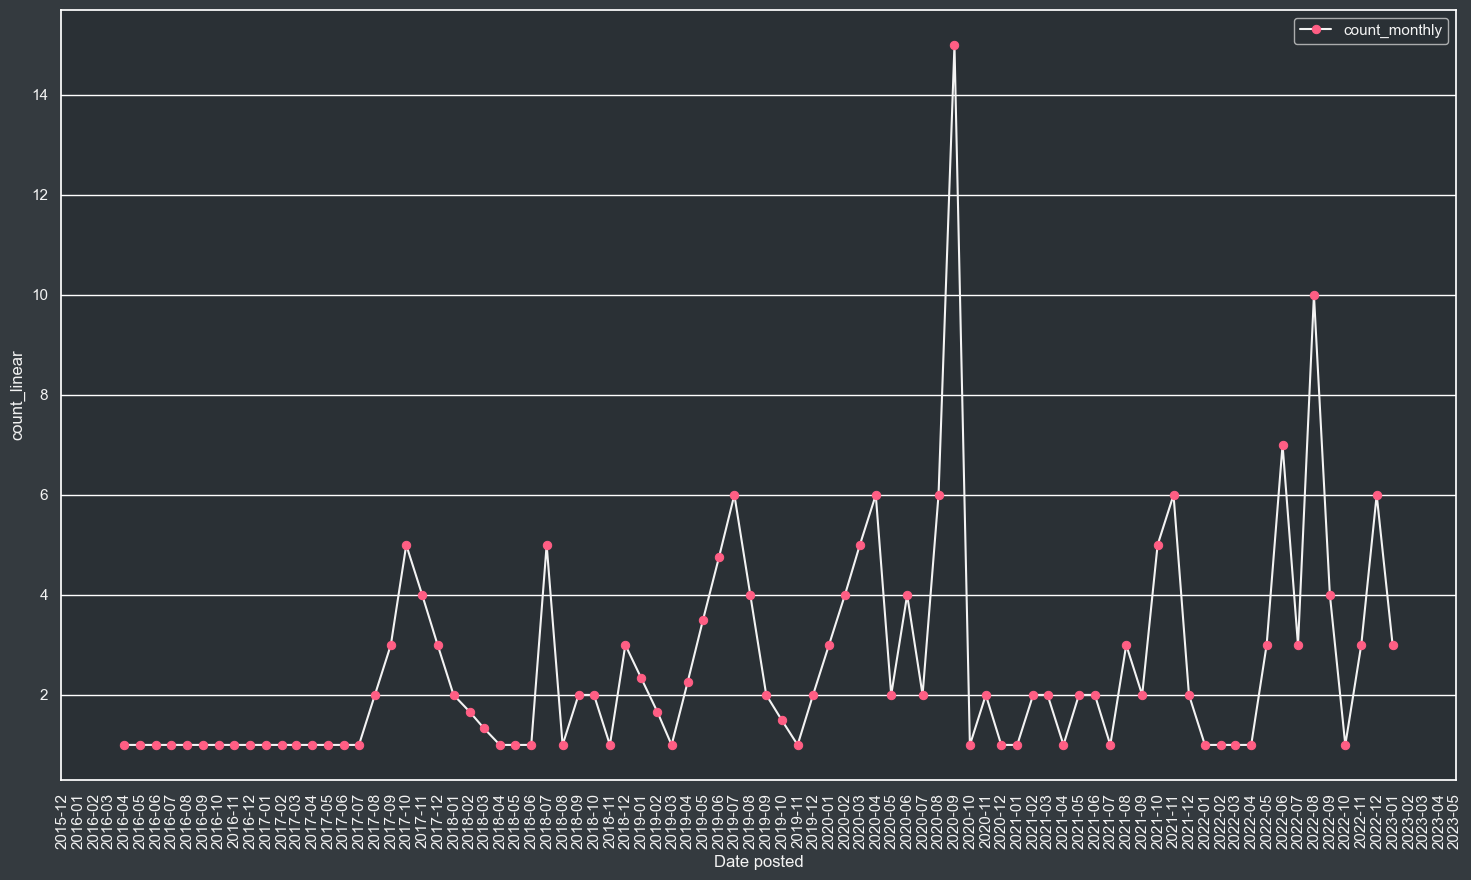

In [18]:
# count_monthly['Year'] = count_monthly.index.year
# months = mn[1:]
# count_monthly['Month'] = count_monthly.index.month
# count_monthly['Month'] = pd.to_datetime(count_monthly['Month'], format = '%m').dt.month_name()
# count_monthly.Month = pd.Categorical(count_monthly.Month, categories= months, ordered=True)

# print(count_monthly)
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

fig, axes = plt.subplots(figsize=(18,10))
sns.lineplot(data=count_monthly['count_linear'], label = 'count_monthly', color = '#f3f3f3', marker = 'o', markerfacecolor = '#ff5e84', markeredgecolor = '#ff5e84')
sns.set(rc={'axes.facecolor':'#2a3035','axes.grid': False, 'figure.facecolor': '#343a3f', 'xtick.color': '#f3f3f3', 'ytick.color': '#f3f3f3', 'text.color': '#f3f3f3', 'axes.labelcolor': '#f3f3f3'})
axes.grid(axis = 'y')

axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

<h3><b>Heatmap</b></h3>

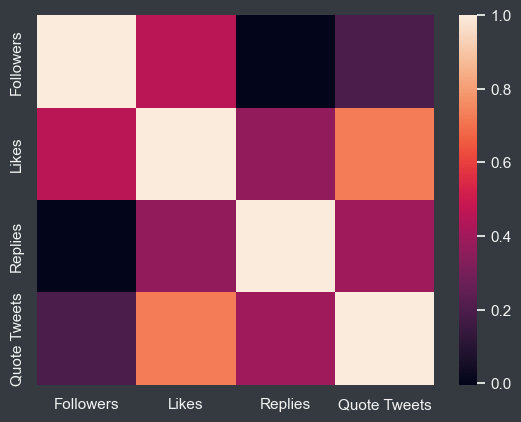

In [19]:
#heatmap
df_heatmap = df[['Followers', 'Likes', 'Replies', 'Quote Tweets']].copy()


for i, row in df_heatmap.iterrows():
    df_heatmap.at[i, 'Followers'] = row.Followers.replace(',','')
df_heatmap['Followers'] = df_heatmap['Followers'].astype('int')

sns.set(rc={'axes.grid': False, 'figure.facecolor': '#343a3f', 'text.color': '#f3f3f3', 'axes.labelcolor': '#f3f3f3'})
ax = sns.heatmap(data = df_heatmap.corr())
for i, tick_label in enumerate(ax.axes.get_yticklabels()):
    tick_label.set_color("#f3f3f3")
for i, tick_label in enumerate(ax.axes.get_xticklabels()):
    tick_label.set_color("#f3f3f3")
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors='#f3f3f3')


<h3><b> Bar plot</b></h3>

<Axes: xlabel='Account type', ylabel='Followers'>

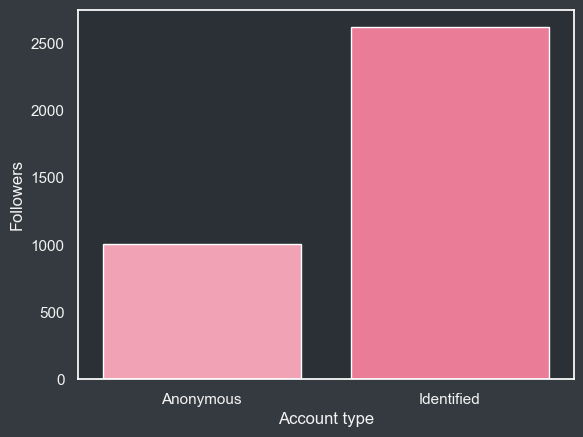

In [20]:
df_bar = df[['Followers', 'Account type']].copy()
for i, row in df_bar.iterrows():
    df_bar.at[i, 'Followers'] = row.Followers.replace(',','')
df_bar['Followers'] = df_bar['Followers'].astype('int')


df_bar = df_bar.groupby('Account type', as_index=False)['Followers'].mean()

sns.set(rc={'axes.facecolor':'#2a3035','axes.grid': False, 'figure.facecolor': '#343a3f', 'xtick.color': '#f3f3f3', 'ytick.color': '#f3f3f3', 'text.color': '#f3f3f3', 'axes.labelcolor': '#f3f3f3'})
sns.barplot(x =df_bar['Account type'][0:2] , y = df_bar['Followers'][0:2], palette = ['#ff95ae', '#fd6a8d'])



<h3></b> Histogram</b></h3>

<Axes: xlabel='Date posted', ylabel='Count'>

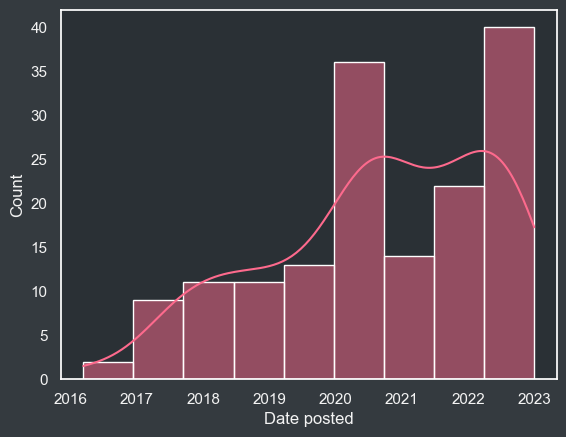

In [21]:
sns.set(rc={'axes.facecolor':'#2a3035','axes.grid': False, 'figure.facecolor': '#343a3f', 'xtick.color': '#f3f3f3', 'ytick.color': '#f3f3f3', 'text.color': '#f3f3f3', 'axes.labelcolor': '#f3f3f3'})
sns.histplot(df['Date posted'].dropna(), kde=True, color ='#fd6a8d')